**Dataset**  We picked over 3200 images plastic and over 2600 images other waste


In [ ]:
import cv2 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow import keras
import seaborn as sns
from keras.models import Sequential,load_model
from keras.layers import LeakyReLU,Conv2D,Activation, MaxPooling2D,Dense,Flatten,ReLU
import matplotlib.pyplot as plt_False_Positive_vs_True_Positive
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:
BASE_DIR = Path().resolve().parent
waste = BASE_DIR / "detection _waste"
waste.mkdir(exist_ok= True,parents=True)
train_data = waste / "train"
train_data.mkdir(exist_ok= True,parents=True)
test_data = train_data / "test"
test_data.mkdir(exist_ok= True,parents=True)
train_data



PosixPath('/content/drive/MyDrive/detection _waste/train')

In [ ]:
#Build CNN Model
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))  # 250x250x3 RGB images
model.add(keras.layers.Conv2D(32, 5, strides=2, use_bias=False))  # output: 123x123x32
model.add(keras.layers.BatchNormalization(axis=3))  # Axis=3 "channels" is the 3rd axis of default data_format(batch_size, height, width, channels)
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Conv2D(64, 3, use_bias=False))  # output: 121x121x64
model.add(keras.layers.BatchNormalization(axis=3))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.MaxPooling2D(3))  # output: 40x40x64

model.add(keras.layers.Conv2D(128, 3, use_bias=False))  # output: 38x38x128
model.add(keras.layers.BatchNormalization(axis=3))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.MaxPooling2D(3))  # output: 12x12x128

# Classification layer.
model.add(keras.layers.Flatten())  # 1x1x18432
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))  # 1x1x128
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 1x1x1

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)  # w = w + momentum * velocity - lr * grad

# compile model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#  Display model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      2400      
                                                                 
 batch_normalization (BatchN  (None, 123, 123, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 123, 123, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 121, 121, 64)      18432     
                                                                 
 batch_normalization_1 (Batc  (None, 121, 121, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 121, 121, 64)      0

In [ ]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0, 
                             rotation_range=10,
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             validation_split=0.3)

# prepare iterators

train_it = datagen.flow_from_directory('train', class_mode='binary', batch_size=32, target_size=(250, 250),subset='training')
valid_it= datagen.flow_from_directory('train', class_mode='binary', batch_size=32, target_size=(250, 250),subset='validation')



# fit model
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10)            
     
history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=valid_it,
                     validation_steps=len(valid_it), epochs=30, verbose=1, callbacks=[es], workers=10)


Found 4137 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/30
130/130 [==============================] - 496s 3s/step - loss: 0.4430 - accuracy: 0.8008 - val_loss: 0.6625 - val_accuracy: 0.5999
Epoch 2/30
130/130 [==============================] - 390s 3s/step - loss: 0.3452 - accuracy: 0.8555 - val_loss: 0.6867 - val_accuracy: 0.6078
Epoch 3/30
130/130 [==============================] - 421s 3s/step - loss: 0.3175 - accuracy: 0.8620 - val_loss: 0.6120 - val_accuracy: 0.7184
Epoch 4/30
130/130 [==============================] - 408s 3s/step - loss: 0.3037 - accuracy: 0.8697 - val_loss: 0.4721 - val_accuracy: 0.7861
Epoch 5/30
130/130 [==============================] - 428s 3s/step - loss: 0.2901 - accuracy: 0.8794 - val_loss: 0.4879 - val_accuracy: 0.7957
Epoch 6/30
130/130 [==============================] - 393s 3s/step - loss: 0.2733 - accuracy: 0.8847 - val_loss: 0.4599 - val_accuracy: 0.8014
Epoch 7/30
130/130 [==============================] - 377s

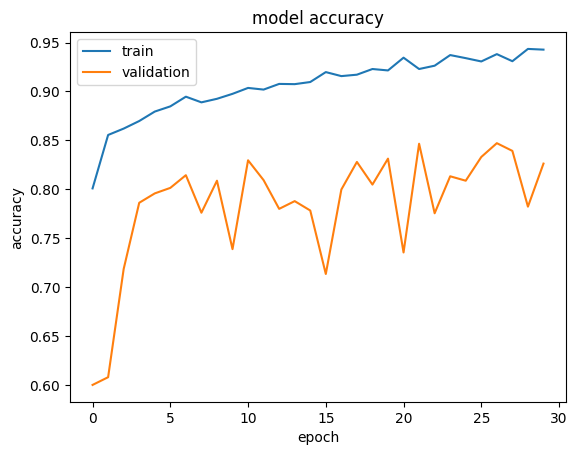

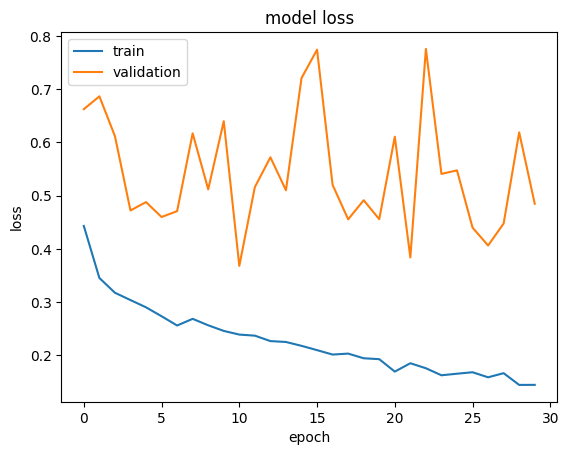

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show() 

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# save model
model.save('detection_waste_plastic.h5')


Found 1181 images belonging to 2 classes.
37/37 [==============================] - 33s 885ms/step

Confusion Matrix
 -------------------------
[[420 107]
 [ 16 638]]
Accuracy: 0.895851
Precision: 0.856376
Recall: 0.975535
F1 score: 0.912080
ROC AUC: 0.969857


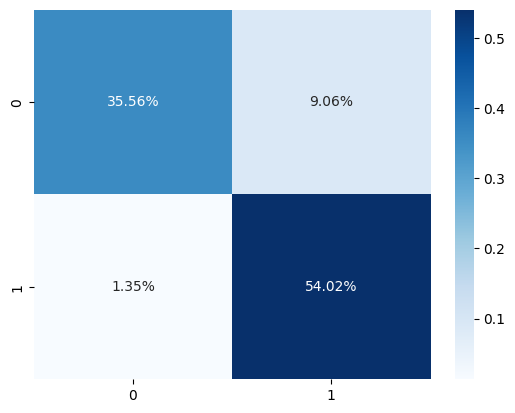

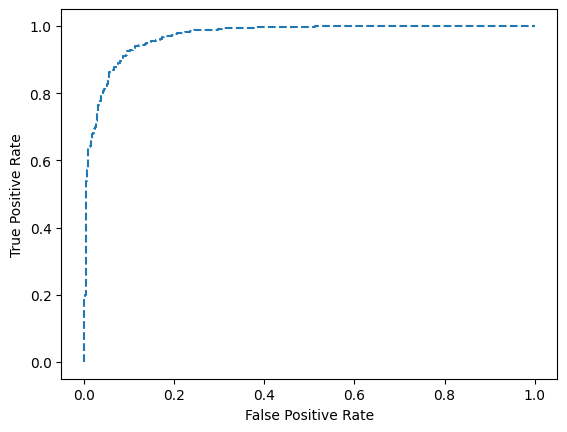

In [ ]:
# load model
model = load_model('detection_waste_plastic.h5')

 
# load test data
tst_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, validation_split=0.2)

test_it= tst_datagen.flow_from_directory('train', class_mode='binary',shuffle=False
                                         , batch_size=32, target_size=(250, 250),subset='validation')


y_true = test_it.classes

y_pred = model.predict(test_it, steps=len(test_it), verbose=1)

y_pred_binary = y_pred> 0.5


#confusion Matrix    
print('\nConfusion Matrix\n -------------------------')    
print(confusion_matrix(y_true,y_pred_binary))

sns.heatmap(confusion_matrix(y_true,y_pred_binary)/np.sum(confusion_matrix(y_true,y_pred_binary)), annot=True,
        fmt='.2%', cmap='Blues')

# accuracy: (tp + tn) / (p + n)

accuracy = accuracy_score(y_true, y_pred_binary)
print('Accuracy: %f' % accuracy)


# precision tp / (tp + fp)
precision = precision_score(y_true, y_pred_binary)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred_binary)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true,y_pred_binary)
print('F1 score: %f' % f1)    
    
# ROC AUC
auc = roc_auc_score(y_true, y_pred)
print('ROC AUC: %f' % auc)


# calculate roc curves
fpr, tpr, _ = roc_curve(y_true, y_pred)
# plot the roc curve for the model
plt.figure()
plt_False_Positive_vs_True_Positive.plot(fpr, tpr, linestyle='--', label='')

# axis labels
plt_False_Positive_vs_True_Positive.xlabel('False Positive Rate')
plt_False_Positive_vs_True_Positive.ylabel('True Positive Rate')

        
# show the plot
plt_False_Positive_vs_True_Positive.show()

In [ ]:
model = load_model('detection_waste_plastic.h5')
test_datagen = ImageDataGenerator(  rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1)
                                  
                                  
                              
    
test_it = test_datagen.flow_from_directory("test",class_mode='binary',shuffle=False, target_size=(250, 250))
probabilities = model.predict(test_it)

print(probabilities)   

Found 757 images belonging to 2 classes.
24/24 [==============================] - 141s 6s/step
[[9.76732075e-01]
 [1.67268440e-02]
 [8.18529259e-03]
 [3.93077824e-03]
 [3.46941143e-01]
 [8.38742137e-01]
 [8.05917501e-01]
 [9.53925312e-01]
 [3.56267035e-01]
 [1.14996694e-02]
 [9.95888054e-01]
 [9.99296546e-01]
 [1.79814771e-02]
 [9.07194376e-01]
 [7.13161886e-01]
 [2.98470020e-01]
 [8.48291874e-01]
 [6.73802793e-01]
 [9.80872095e-01]
 [9.01171982e-01]
 [2.28001058e-01]
 [9.83820796e-01]
 [4.26583551e-02]
 [2.84317769e-02]
 [7.92520225e-01]
 [5.05648375e-01]
 [9.98621106e-01]
 [7.44673014e-01]
 [6.16380394e-01]
 [9.63179708e-01]
 [8.50541413e-01]
 [7.67144024e-01]
 [8.66875529e-01]
 [9.58560288e-01]
 [6.59960091e-01]
 [8.68104875e-01]
 [8.71364772e-01]
 [9.36353922e-01]
 [9.71730769e-01]
 [9.85456109e-01]
 [8.70932400e-01]
 [9.08056855e-01]
 [6.80970311e-01]
 [9.96203899e-01]
 [9.59464490e-01]
 [1.40020326e-02]
 [9.92590725e-01]
 [4.21600431e-01]
 [5.54054379e-01]
 [9.96466696e-01]
 [9.2

In [ ]:
y_pred = probabilities > 0.5

classit = [['plastic' for x in y_pred  if x[0]== True] ,['others_waste' for x in y_pred if x[0]==False]]
classit 
class_names = ['plastic', 'others_waste']
print(classit)

[['plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic

In [ ]:

models = load_model('detection_waste_plastic.h5')
video = cv2.VideoCapture(0)

while True:
        _, frame = video.read()

        im = Image.fromarray(frame, 'RGB')

        im = im.resize((250,250))
        img_array = np.array(im)

        img_array = np.expand_dims(img_array, axis=0)

        prediction =model.predict(img_array)
        if prediction[0]>0.5:
                label="plastic"
        else:
                label="other_waste"
                
        cv2.putText(frame,label,(10,30),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1.0,(0,255,0),2)
        cv2.imshow('plastic detection',frame)
        
        cv2.imshow("plastic detection", frame)
        key=cv2.waitKey(1)
        if key == ord('q'):
                break
video.release()
cv2.destroyAllWindows()